<a href="https://colab.research.google.com/github/ayushxx7/pandas-course-project/blob/master/Market_Association_Grocery_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Grocery Data Analysis**
### Market Association

## Data Prepartion

#### Setup Kaggle, Download and Extract Dataset

In [2]:
import json
import zipfile
import os

In [3]:
!pip install kaggle
api_token = {"username":"ayushxx7","key":"32c5490ba78a5c6e8eaa81a18380c7dd"}
!mkdir -p ~/.kaggle
with open('kaggle.json', 'w') as file:
    json.dump(api_token, file)
!cp kaggle.json ~/.kaggle/
!ls ~/.kaggle
!chmod 600 /root/.kaggle/kaggle.json
!kaggle datasets download -d heeraldedhia/groceries-dataset

for file in os.listdir():
    if '.zip' in file:
      zip_ref = zipfile.ZipFile(file, 'r')
      zip_ref.extractall()
      zip_ref.close()

kaggle.json
  0% 0.00/257k [00:00<?, ?B/s]
100% 257k/257k [00:00<00:00, 80.5MB/s]


#### Imports

In [4]:
import pandas as pd
df = pd.read_csv('Groceries_dataset.csv')
df.head(5)

,Member_number,Date,itemDescription
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk


### Find out items that are frequenty bought together
- Group by customer ID and date
 - Find max count (which items are most associated)
 - remove outliers

### Find out which items are most popular (value_counts)

In [9]:
# Checking whether any incorrect value is present
for item in df.itemDescription.unique():
  print(item)

tropical fruit
whole milk
pip fruit
other vegetables
rolls/buns
pot plants
citrus fruit
beef
frankfurter
chicken
butter
fruit/vegetable juice
packaged fruit/vegetables
chocolate
specialty bar
butter milk
bottled water
yogurt
sausage
brown bread
hamburger meat
root vegetables
pork
pastry
canned beer
berries
coffee
misc. beverages
ham
turkey
curd cheese
red/blush wine
frozen potato products
flour
sugar
frozen meals
herbs
soda
detergent
grapes
processed cheese
fish
sparkling wine
newspapers
curd
pasta
popcorn
finished products
beverages
bottled beer
dessert
dog food
specialty chocolate
condensed milk
cleaner
white wine
meat
ice cream
hard cheese
cream cheese 
liquor
pickled vegetables
liquor (appetizer)
UHT-milk
candy
onions
hair spray
photo/film
domestic eggs
margarine
shopping bags
salt
oil
whipped/sour cream
frozen vegetables
sliced cheese
dish cleaner
baking powder
specialty cheese
salty snack
Instant food products
pet care
white bread
female sanitary products
cling film/bags
soap
fro

In [11]:
df.itemDescription.value_counts()

whole milk               2502
other vegetables         1898
rolls/buns               1716
soda                     1514
yogurt                   1334
                         ... 
make up remover             5
bags                        4
baby cosmetics              3
kitchen utensil             1
preservation products       1
Name: itemDescription, Length: 167, dtype: int64

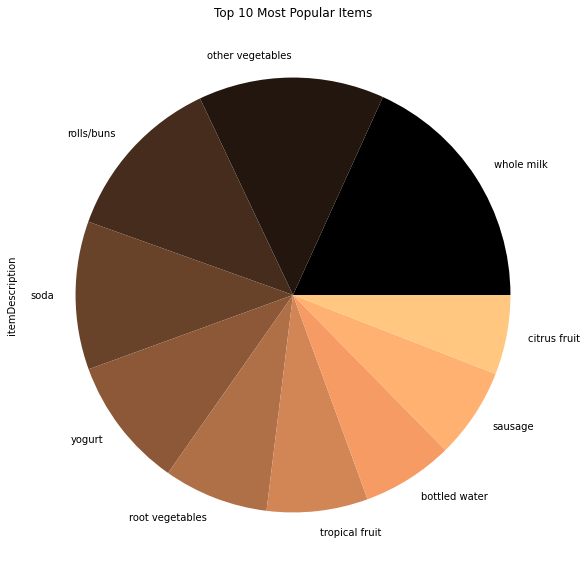

In [46]:
df.itemDescription.value_counts()[:10].plot(kind='pie', figsize=(10,10), colormap='copper', title="Top 10 Most Popular Items")

The most selling product is `Whole Milk` (sold 2500+).

### Find out customers that are most loyal


In [47]:
df.Member_number.value_counts()

3180    36
3050    33
2051    33
3737    33
2433    31
        ..
4565     2
2373     2
3788     2
2614     2
2844     2
Name: Member_number, Length: 3898, dtype: int64

In [64]:
df[['Member_number', 'Date']].groupby(by=['Member_number', 'Date']).size()

Member_number  Date      
1000           15-03-2015    4
               24-06-2014    3
               24-07-2015    2
               25-11-2015    2
               27-05-2015    2
                            ..
4999           24-01-2015    6
               26-12-2015    2
5000           09-03-2014    2
               10-02-2015    3
               16-11-2014    2
Length: 14963, dtype: int64

In [ ]:
df.groupby(['Member_number', 'Date']).size().reset_index(name='counts')

In [91]:
new_df = df.groupby(['Member_number', 'Date']).size().reset_index(name='counts')
new_df.head()

,Member_number,Date,counts
0,1000,15-03-2015,4
1,1000,24-06-2014,3
2,1000,24-07-2015,2
3,1000,25-11-2015,2
4,1000,27-05-2015,2


In [96]:
for key in new_df:
  print(key)

Member_number
Date
counts


38765

## References
- [Download dataset from Kaggle](https://gist.github.com/jayspeidell/d10b84b8d3da52df723beacc5b15cb27#gistcomment-3509158)
- [How to plot value_counts](https://mode.com/python-tutorial/counting-and-plotting-in-python/#visualizing-data-with-plot)
- [Colorscheme](https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html)
- [Pandas documentation for Plots](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.html)